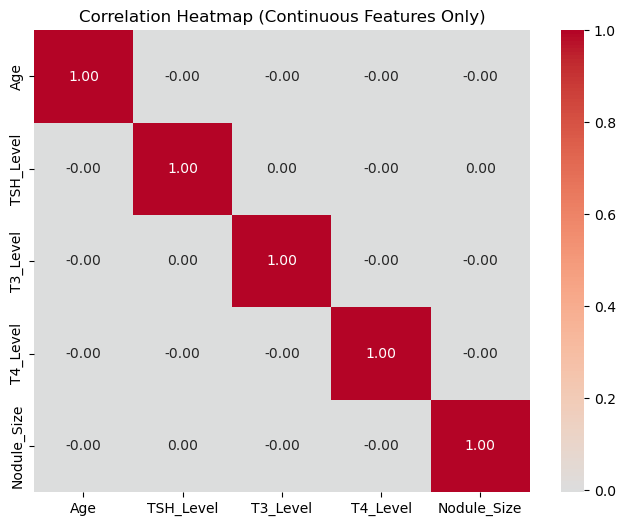


=== Top 10 strongest absolute correlations (continuous only) ===
T4_Level     T3_Level     0.004069
             Age          0.002373
Nodule_Size  T4_Level     0.001860
             T3_Level     0.001799
             Age          0.001489
T3_Level     Age          0.001013
TSH_Level    Age          0.000925
T4_Level     TSH_Level    0.000795
Nodule_Size  TSH_Level    0.000416
T3_Level     TSH_Level    0.000335
dtype: float64


In [1]:
import pandas as pd              # Προσθήκη DataFrames για αξιόπιστη αποθήκευση/μετασχηματισμό.
import matplotlib.pyplot as plt  # Προσθήκη Matplotlib για παραμετροποίηση και αποθήκευση γραφημάτων.
import seaborn as sns            # Προσθήκη Seaborn για την χρήση τεχνικών οπτικοποίησης που δεν παρεχονται από την Matplotlib
import numpy as np               # Προσθήκη NumPy για την διαμόρφωση του πίνακα συσχετίσεων. 


# === 1) Φόρτωση dataset και επιλογή δεδομένων ===
df = pd.read_excel("Dataset_Cleaned.xlsx") #Εισαγωγή του καθαρισμένου dataset από Excel για αναπαραγωγικότητα. 


# === 2) Εστίαση στις συνεχείς μεταβλητές ===
# Ρητός προσδιορισμός συνεχών μεταβλητών, απαραίτητος για έγκυρο υπολογισμό συσχετίσεων.
continuous_features = ["Age", "TSH_Level", "T3_Level", "T4_Level", "Nodule_Size"] 

# Δημιουργία υποσυνόλου/Dataframe μόνο με συνεχείς μεταβλητές για έγκυρο υπολογισμό συσχετίσεων.
df_continuous = df[continuous_features] 
 
# === 3) Υπολογισμός συσχετίσεων (Pearson) ===
# Ο Pearson εκτιμά τον βαθμό γραμμικής συσχέτισης μεταξύ συνεχών μεταβλητών και εντοπίζει πιθανή πολυσυγγραμμικότητα.
corr = df_continuous.corr(method='pearson') 
 
# === 4) Οπτικοποίηση Συσχετίσεων (Correlation Heatmap) ===
# Το heatmap παρέχει άμεση και διαισθητική κατανόηση της έντασης και κατεύθυνσης των σχέσεων.
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap (Continuous Features Only)")
plt.show()
 
# === 5) Εντοπισμός των 10 ισχυρότερων συσχετίσεων  (απόλυτη τιμή) ===
corr_unstacked = corr.abs().where(~np.tril(np.ones(corr.shape)).astype(bool))
top_corrs = corr_unstacked.unstack().dropna().sort_values(ascending=False)
 
print("\n=== Top 10 strongest absolute correlations (continuous only) ===")
print(top_corrs.head(10)) 
# Η ιεράρχηση κατά απόλυτη τιμή |r| επιτρέπει την επισήμανση των σημαντικότερων σχέσεων μεταξύ μεταβλητών.

### Τι δείχνει το Heatmap

- Όλες οι συσχετίσεις είναι πολύ κοντά στο **μηδέν**.  
- Δεν εντοπίζεται καμία έντονη γραμμική σχέση μεταξύ των συνεχών χαρακτηριστικών *(Age, TSH, T3, T4, Nodule Size)*.  

---

### Συμπέρασμα

Το dataset δεν περιέχει ισχυρές γραμμικές εξαρτήσεις μεταξύ των συνεχών μεταβλητών.  
Αυτό σημαίνει ότι οι μεταβλητές είναι σχετικά **ανεξάρτητες**, κάτι που μπορεί να είναι θετικό για τα μελλοντικά μοντέλα, καθώς μειώνεται το πρόβλημα της **πολυσυγγραμμικότητας (multicollinearity)**.

 